# Worksheet 6

In [1]:
%matplotlib inline

# Questions

## Question 1

Explain the shooting method for BVPs.

## Question 2

Give a complete algorithm for solving the BVP

$$
  y'' − 3 y' + 2y = 0, \quad y(0) = 0, \quad y(1) = 1
$$

using the finite difference method. Include the description of the grid, the grid spacing, the treatment of the boundary conditions, the finite difference operators and a description of the linear system to be solved. You do not need to say which method would be used to solve the linear system, but should mention any special properties of the system that might make it easier to solve.

## Question 3

Explain how your algorithm would have to be modified to solve the BVP where the boundary condition at $x = 1$ becomes the Neumann condition

$$
  y'(1) = 1 + \frac{e}{e − 1}.
$$

## Coding Question 1

Write a simple shooting method to solve the BVP
$$
  y'' − 3 y' + 2 y = 0, \quad y(0) = 0, \quad y(1) = 1.
$$

Use standard black-box methods to solve the ODE, rewritten in first order form, and either a simple bisection method or the standard black-box methods to find the root. Compare your estimate against the answer

$$
  y(x) = \frac{e^{2 x − 1} − e^{x − 1}}{e − 1}.
$$

## Coding Question 2

Implement your finite difference algorithm algorithm above to solve this BVP, using a standard black-box linear system solver. Show that your result converges to the correct answer.

## Coding Question 3

Modify your algorithm for the Neumann boundary condition above. Check that it converges to the same answer as for the Dirichlet case.

# Answers

## Question 1

Explain the shooting method for BVPs.

### Answer Question 1

The boundary value problem for $y(x)$ with boundary data at $x = a, b$ is converted to an initial value problem for $y(x)$ by, at first, guessing the additional (initial) boundary data $z$ at $x = a$ that is required for a properly posed (i.e., completely specified) IVP. The IVP can then be solved using any appropriate solver to get some solution $y(x; z)$ that depends on the guessed initial data $z$. By comparing against the required boundary data at $y(b)$ we can check if we have the correct solution of the original BVP. To be precise, we can write

$$
  \phi (z) = \left. y(x; z) \right|_{x=b} − y(b),
$$

a nonlinear equation for $z$. At the root where $\phi(z) = 0$ we have the appropriate initial data $z$ such that the solution of the IVP is also a solution of the original BVP. The root of this nonlinear equation can be found using any standard method such as bisection or the secant method.

## Question 2

Give a complete algorithm for solving the BVP

$$
  y'' − 3 y' + 2y = 0, \quad y(0) = 0, \quad y(1) = 1
$$

using the finite difference method. Include the description of the grid, the grid spacing, the treatment of the boundary conditions, the finite difference operators and a description of the linear system to be solved. You do not need to say which method would be used to solve the linear system, but should mention any special properties of the system that might make it easier to solve.

### Answer Question 2

We first choose the grid. We will use $N + 2$ point to cover the domain $x \in [0, 1]$; this implies that we have a grid spacing $h = 1 / (N + 1)$ and we can explicitly write the coordinates of the grid points as

$$
  x_i = h i, \quad i = 0, 1, \dots , N + 1.
$$

We denote the value of the (approximate finite difference) solution at the grid points as $y_i (\approx y(x_i))$. We will impose the boundary conditions using

$$
\begin{aligned}
  y_0 & = y(0) & y_{N +1} & = y(1) \\
      & = 0    &          & = 1.
\end{aligned} 
$$

We will use central differencing which gives

$$
\begin{aligned}
  \left. y'(x)  \right|_{x = x_i} & \approx \frac{y_{i+1} − y_{i−1}}{2 h}, \\
  \left. y''(x) \right|_{x = x_i} & \approx \frac{y_{i+1} + y_{i−1} - 2 y_i}{h^2}.
\end{aligned}
$$

We can then substitute all of these definitions into the original definition to find the finite difference
equation that holds for the interior points $i = 1, \dots , N$:

$$
  y_{i+1} \left( 1 − \frac{3}{2} h \right) + y_i \left( −2 + 2 h^2 \right) + y_{i−1} \left( 1 + \frac{3}{2} h \right) = 0.
$$

This defines a linear system for the unknowns $y_i , i = 1, \dots , N$ of the form

$$
  T {\bf y} = {\bf f}.
$$

We can see that the matrix $T$ is tridiagonal and has the form

$$
  T = 
    \begin{pmatrix}
      -2 + 2 h^2 & 1 - \tfrac{3}{2} h & 0 & 0 & 0 & \dots & 0 \\
      1 + \tfrac{3}{2} h & -2 + 2 h^2 & 1 - \frac{3}{2} h & 0 & 0 & \dots & 0 \\
      0 & 1 + \tfrac{3}{2} h & -2 + 2 h^2 & 1 - \frac{3}{2} h & 0 & \dots & 0 \\
      0 & 0 & \ddots & \ddots & \ddots & \dots & 0 \\
      0 & \dots & 0 & 1 + \tfrac{3}{2} h & -2 + 2 h^2 & 1 - \frac{3}{2} h & 0 \\
      0 & \dots & \dots & 0 & 1 + \tfrac{3}{2} h & -2 + 2 h^2 & 1 - \frac{3}{2} h \\
      0 & \dots & \dots & \dots & 0 & 1 + \tfrac{3}{2} h & -2 + 2 h^2 
    \end{pmatrix}
$$

The right hand side vector results from the boundary data and is

$$
  {\bf f} = \begin{pmatrix} - \left( 1 + \tfrac{3}{2} h \right) y_0 \\ 0 \\ \vdots \\ 0 \\ - \left( 1 - \tfrac{3}{2} h \right) y_{N+1} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ \vdots \\ 0 \\ 0 \end{pmatrix}.
$$

As the system is given by a tridiagonal matrix it is simple and cheap to solve using, e.g., the Thomas algorithm.

## Question 3

Explain how your algorithm would have to be modified to solve the BVP where the boundary condition at $x = 1$ becomes the Neumann condition

$$
  y'(1) = 1 + \frac{e}{e − 1}.
$$

### Answer Question 3

First a finite difference representation of the boundary condition is required. A first order representation would be to use backward differencing

$$
  \frac{y_{N + 1} − y_N}{h} = 1 + \frac{e}{e - 1}.
$$

This can be rearranged to give

$$
  y_{N + 1} = y_N + h \left( 1 + \frac{e}{e − 1} \right).
$$

So now whenever we replaced $y(1)$ as represented by $y_{N + 1}$ by the boundary value in the previous algorithm we must instead replace it with the above equation which uses the known boundary data and unknown interior values.

Explicitly, this modifies the matrix $T$ to

$$
  T = 
    \begin{pmatrix}
      -2 + 2 h^2 & 1 - \tfrac{3}{2} h & 0 & 0 & 0 & \dots & 0 \\
      1 + \tfrac{3}{2} h & -2 + 2 h^2 & 1 - \frac{3}{2} h & 0 & 0 & \dots & 0 \\
      0 & 1 + \tfrac{3}{2} h & -2 + 2 h^2 & 1 - \frac{3}{2} h & 0 & \dots & 0 \\
      0 & 0 & \ddots & \ddots & \ddots & \dots & 0 \\
      0 & \dots & 0 & 1 + \tfrac{3}{2} h & -2 + 2 h^2 & 1 - \frac{3}{2} h & 0 \\
      0 & \dots & \dots & 0 & 1 + \tfrac{3}{2} h & -2 + 2 h^2 & 1 - \frac{3}{2} h \\
      0 & \dots & \dots & \dots & 0 & 1 + \tfrac{3}{2} h & -2 + 2 h^2 + \color{red}{\left(1 - \frac{3}{2} h \right)} 
    \end{pmatrix}
$$

and the right hand side vector ${\bf f}$ to

$$
  {\bf f} = \begin{pmatrix} 0 \\ 0 \\ \vdots \\ 0 \\ \color{red}{- \left( 1 - \frac{3}{2} h \right) h \left( 1 + \frac{e}{e - 1} \right)} \end{pmatrix}.
$$

## Coding Question 1

Write a simple shooting method to solve the BVP
$$
  y'' − 3 y' + 2 y = 0, \quad y(0) = 0, \quad y(1) = 1.
$$

Use standard black-box methods to solve the ODE, rewritten in first order form, and either a simple bisection method or the standard black-box methods to find the root. Compare your estimate against the answer

$$
  y(x) = \frac{e^{2 x − 1} − e^{x − 1}}{e − 1}.
$$

### Answer Coding Question 1

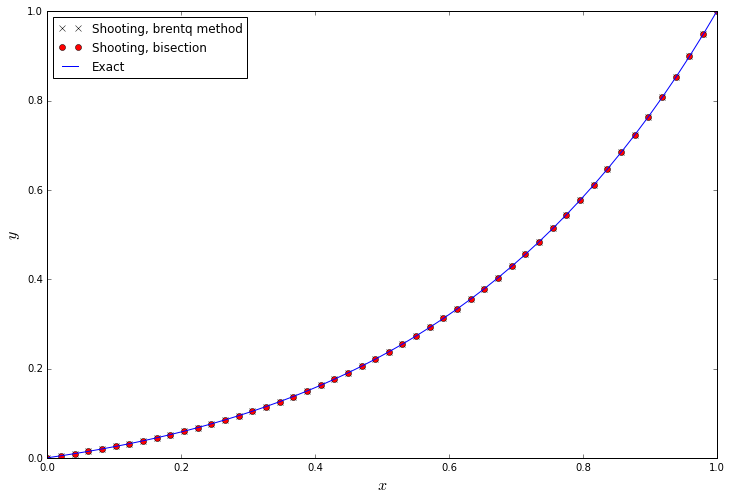

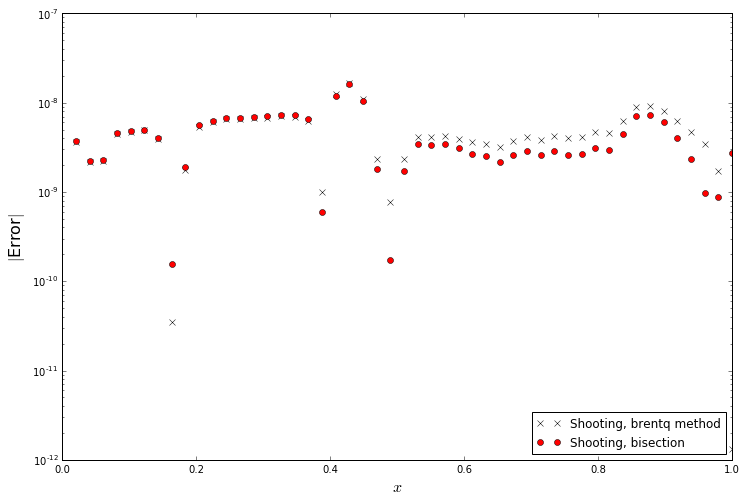

In [2]:
import numpy
from matplotlib import pyplot
from scipy import integrate, optimize, linalg

def shooting_Dirichlet(f, ivp_interval, guess_interval, y_bc, 
                       method = 'brentq', tolerance = 1.e-8,
                       MaxSteps = 100):
    """
    Solve the BVP z' = f(x, z) on x \in ivp_interval = [a, b]
    where z = [y, y'], subject to boundary conditions 
    y(a) = y_bc[0], y(b) = y_bc[1].
    """
    
    # Define the function computing the error in the 
    # boundary condition at b
    def shooting_phi(guess):
        """Internal function for the root-finding"""
    
        # The initial conditions from the guess and the 
        # boundary conditions
        y0 = [y_bc[0], guess]
        # Solve the IVP
        y = integrate.odeint(f, y0, numpy.linspace(ivp_interval[0], 
                                                   ivp_interval[1]))
        
        # Compute the error at the final point
        return y[-1, 0] - y_bc[1]
    
    # Choose between the root-finding methods
    if (method == 'bisection'):
        guess_min = guess_interval[0]
        guess_max = guess_interval[1]
        
        phi_min = shooting_phi(guess_min)
        phi_max = shooting_phi(guess_max)
        assert(phi_min * phi_max < 0.0)
        for i in range(MaxSteps):
            guess = (guess_min + guess_max) / 2.0
            phi = shooting_phi(guess)
            if (phi_min * phi < 0.0):
                guess_max = guess
                phi_max = phi
            else:
                guess_min = guess
                phi_min = phi
            if ((abs(phi) < tolerance) or 
               (guess_max - guess_min < tolerance)):
                break
    elif (method == 'brentq'):
        guess = optimize.brentq(shooting_phi, guess_interval[0], 
                                guess_interval[1])
    else:
        raise Exception("method parameter must be in "
                        "['brentq', 'bisection']")
        
    # The initial conditions from the boundary, 
    # and the now "correct" value from the root-find
    y0 = [y_bc[0], guess]
    # Solve the IVP
    x = numpy.linspace(ivp_interval[0], ivp_interval[1])
    y = integrate.odeint(f, y0, x)
    
    return [x, y]

# Define the specific ODE to be solved
def f_bvp(y, x):
    """
    First order form of the above ODE
    """
    
    dydx = numpy.zeros_like(y)
    
    dydx[0] = y[1]
    dydx[1] = 3.0 * y[1] - 2.0 * y[0]
    
    return dydx

# Define the exact solution for comparison
def y_exact(x):
    """
    Exact solution as given above.
    """
    
    return (numpy.exp(2.0*x - 1.0) - numpy.exp(x - 1.0)) / \
           (numpy.exp(1.0) - 1.0)

# Now test it on the BVP to be solved

x, y_brentq = shooting_Dirichlet(f_bvp, [0.0, 1.0], 
                                 [-10.0, 10.0], [0.0, 1.0])
x, y_bisection = shooting_Dirichlet(f_bvp, [0.0, 1.0], 
                                    [-10.0, 10.0], [0.0, 1.0], 
                                    method = 'bisection')

pyplot.figure(figsize = (12, 8))
pyplot.plot(x, y_brentq[:, 0], 'kx', x, y_bisection[:, 0], 'ro',
            x, y_exact(x), 'b-')
pyplot.xlabel('$x$', size = 16)
pyplot.ylabel('$y$', size = 16)
pyplot.legend(('Shooting, brentq method', 'Shooting, bisection', 'Exact'),
              loc = "upper left")


pyplot.figure(figsize = (12, 8))
pyplot.semilogy(x, numpy.absolute(y_brentq[:, 0] - y_exact(x)), 'kx',
                x, numpy.absolute(y_bisection[:, 0] - y_exact(x)), 'ro')
pyplot.xlabel('$x$', size = 16)
pyplot.ylabel('$|$Error$|$', size = 16)
pyplot.legend(('Shooting, brentq method', 'Shooting, bisection'),
              loc = "lower right")
pyplot.show()
        

## Coding Question 2

Implement your finite difference algorithm algorithm above to solve this BVP, using a standard black-box linear system solver. Show that your result converges to the correct answer.

### Answer Coding Question 2

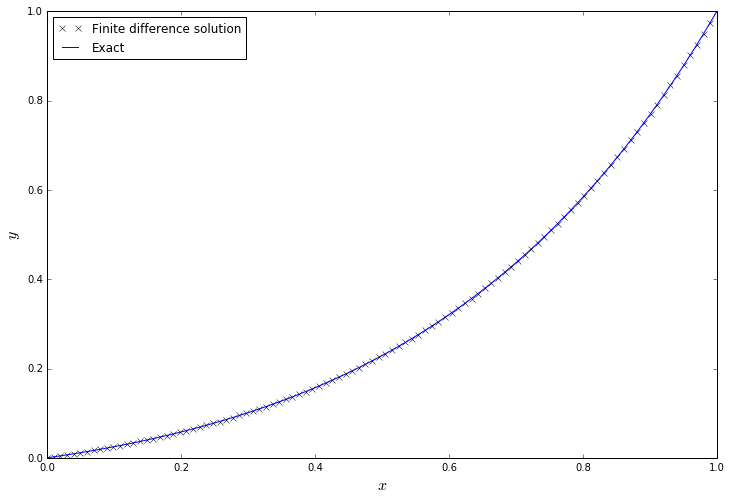

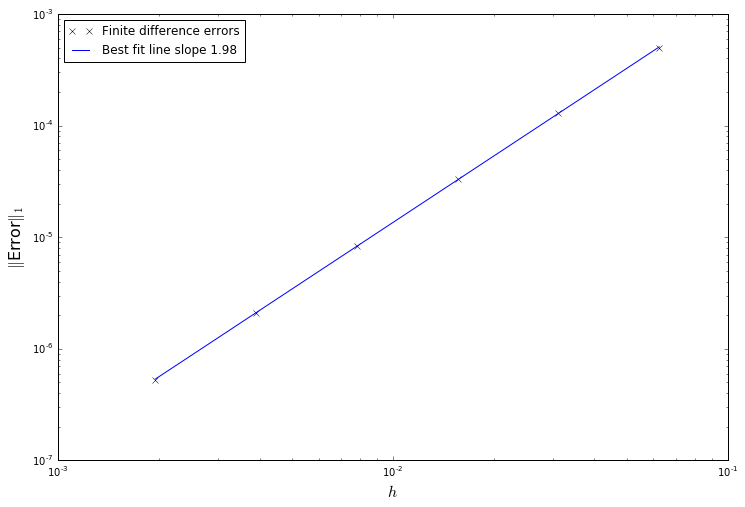

In [3]:
def bvp_FD_Dirichlet(p, q, f, interval, y_bc, N = 100):
    """
    Solve linear BVP y'' + p(x) y' + q(x) y = f(x) on the 
    given interval = [a, b] using y(a) = y_bc[0], y(b) = y_bc[1].
    """
    
    h = (interval[1] - interval[0]) / (N + 1.0)
    # The grid, including boundaries, 
    # and set up final solution (fix at boundaries)
    x = numpy.linspace(interval[0], interval[1], N+2)
    y = numpy.zeros_like(x)
    y[0]  = y_bc[0]
    y[-1] = y_bc[1]
    # Set up diagonal entries of the matrix. 
    # Call sub-diagonal, diagonal, and super-diagonal vectors 
    # VE, VF, VG.
    VE = 1.0 - h / 2.0 * p(x[2:-1])
    VF = -2.0 + h**2 * q(x[1:-1])
    VG = 1.0 + h / 2.0 * p(x[1:-2])
    # Set up RHS vector F
    F = h**2 * f(x[1:-1])
    # Include boundary contributions
    F[0]  -= y_bc[0] * (1.0 - h / 2.0 * p(x[1]))
    F[-1] -= y_bc[1] * (1.0 + h / 2.0 * p(x[-2]))
    # Be lazy: set up full matrix
    T = numpy.diag(VE, -1) + numpy.diag(VF) + numpy.diag(VG, +1)
    y[1:-1] = linalg.solve(T, F)
    
    return [x, y]

# Define the problem to be solved

def bvp_p(x):
    """
    Term proportional to y' in definition of BVP
    """
    
    return -3.0 * numpy.ones_like(x)

def bvp_q(x):
    """
    Term proportional to y in definition of BVP
    """
    
    return 2.0 * numpy.ones_like(x)

def bvp_f(x):
    """
    Term on RHS in definition of BVP
    """
    
    return numpy.zeros_like(x)

# Define the exact solution for comparison
def y_exact(x):
    """
    Exact solution as given above.
    """
    
    return (numpy.exp(2.0*x - 1.0) - numpy.exp(x - 1.0)) / \
           (numpy.exp(1.0) - 1.0)

# Now solve the problem

x, y = bvp_FD_Dirichlet(bvp_p, bvp_q, bvp_f, [0.0, 1.0], [0.0, 1.0])


pyplot.figure(figsize = (12, 8))
pyplot.plot(x, y, 'kx', x, y_exact(x), 'b-')
pyplot.xlabel('$x$', size = 16)
pyplot.ylabel('$y$', size = 16)
pyplot.legend(('Finite difference solution', 'Exact'), loc = "upper left")

# Now do a convergence test

levels = numpy.array(range(4, 10))
Npoints = 2**levels
err_2norm = numpy.zeros(len(Npoints))
for i in range(len(Npoints)):
    x, y = bvp_FD_Dirichlet(bvp_p, bvp_q, bvp_f, [0.0, 1.0], [0.0, 1.0],
                            Npoints[i])
    err_2norm[i] = linalg.norm(y - y_exact(x), 2) / numpy.sqrt(Npoints[i])

# Best fit to the errors
h = 1.0 / Npoints
p = numpy.polyfit(numpy.log(h), numpy.log(err_2norm), 1)

fig = pyplot.figure(figsize = (12, 8), dpi = 50)
pyplot.loglog(h, err_2norm, 'kx')
pyplot.loglog(h, numpy.exp(p[1]) * h**(p[0]), 'b-')
pyplot.xlabel('$h$', size = 16)
pyplot.ylabel('$\|$Error$\|_1$', size = 16)
pyplot.legend(('Finite difference errors',
               "Best fit line slope {0:.3}".format(p[0])),
              loc = "upper left")

pyplot.show()

## Coding Question 3

Modify your algorithm for the Neumann boundary condition above. Check that it converges to the same answer as for the Dirichlet case.

### Answer Coding Question 3

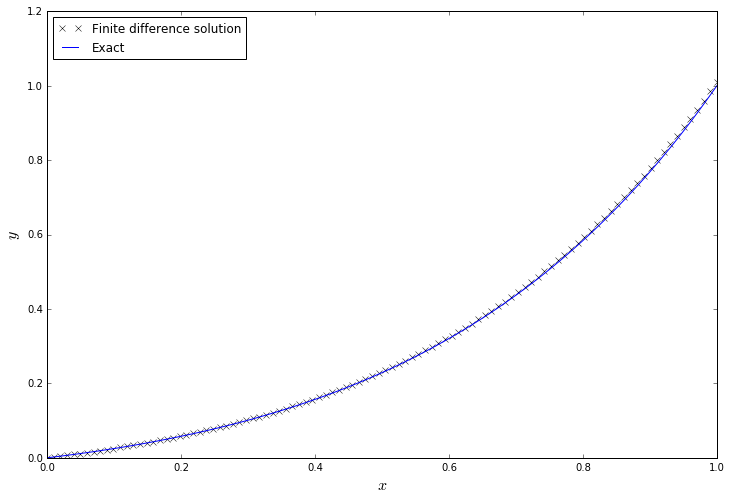

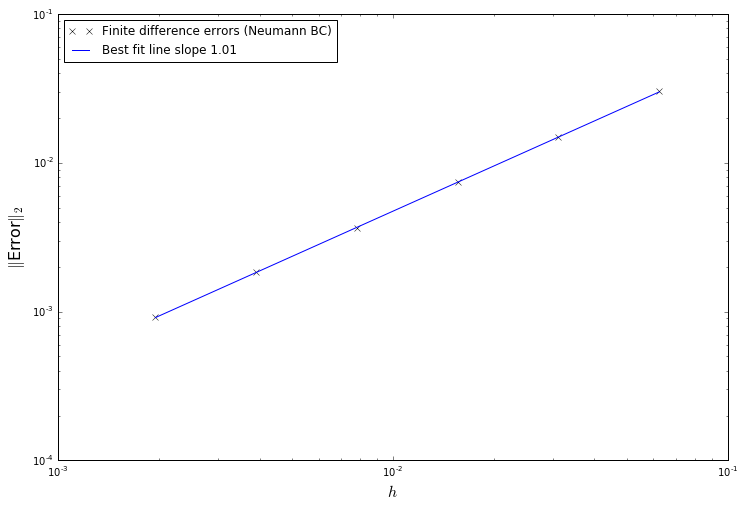

In [4]:
def bvp_FD_DirichletNeumann(p, q, f, interval, y_bc, N = 100):
    """
    Solve linear BVP y'' + p(x) y' + q(x) y = f(x) on the
    given interval = [a, b] using y(a) = y_bc[0], y'(b) = y_bc[1].
    """
    
    h = (interval[1] - interval[0]) / (N + 1.0)
    # The grid, including boundaries, and set up final solution
    # (fix at boundaries)
    x = numpy.linspace(interval[0], interval[1], N+2)
    y = numpy.zeros_like(x)
    y[0]  = y_bc[0]
    # Neumann boundary condition at the right end,
    # so value of solution unknown
    
    # Set up diagonal entries of the matrix. 
    # Call sub-diagonal, diagonal, and super-diagonal vectors 
    # VE, VF, VG.
    VE = 1.0 - h / 2.0 * p(x[2:-1])
    VF = -2.0 + h**2 * q(x[1:-1])
    VG = 1.0 + h / 2.0 * p(x[1:-2])
    # Set up RHS vector F
    F = h**2 * f(x[1:-1])
    # Include boundary contributions
    F[0]  -= y_bc[0] * (1.0 - h / 2.0 * p(x[1]))
    # Neumann boundary condition at the right end - 
    # modify matrix and RHS vector
    VF[-1] += (1.0 + h / 2.0 * p(x[-2])) 
    F[-1] -= (1.0 + h / 2.0 * p(x[-2])) * h * y_bc[1]
    # Be lazy: set up full matrix
    T = numpy.diag(VE, -1) + numpy.diag(VF) + numpy.diag(VG, +1)
    y[1:-1] = linalg.solve(T, F)
    # Finally set the solution at the right boundary
    y[-1] = y[-2] + h * y_bc[1]
    
    return [x, y]

# Define the problem to be solved

def bvp_p(x):
    """
    Term proportional to y' in definition of BVP
    """
    
    return -3.0 * numpy.ones_like(x)

def bvp_q(x):
    """
    Term proportional to y in definition of BVP
    """
    
    return 2.0 * numpy.ones_like(x)

def bvp_f(x):
    """
    Term on RHS in definition of BVP
    """
    
    return numpy.zeros_like(x)

# Define the exact solution for comparison
def y_exact(x):
    """
    Exact solution as given above.
    """
    
    return (numpy.exp(2.0*x - 1.0) - numpy.exp(x - 1.0)) / \
(numpy.exp(1.0) - 1.0)

# Now solve the problem

x, y = bvp_FD_DirichletNeumann(bvp_p, bvp_q, bvp_f, 
                               [0.0, 1.0], 
                               [0.0, 1.0 + numpy.exp(1.0) / \
                                     (numpy.exp(1.0) - 1.0)])

pyplot.figure(figsize = (12, 8))
pyplot.plot(x, y, 'kx', x, y_exact(x), 'b-')
pyplot.xlabel('$x$', size = 16)
pyplot.ylabel('$y$', size = 16)
pyplot.legend(('Finite difference solution', 'Exact'), loc = "upper left")

# Now do a convergence test

levels = numpy.array(range(4, 10))
Npoints = 2**levels
err_DN_2norm = numpy.zeros(len(Npoints))
for i in range(len(Npoints)):
    x, y = bvp_FD_DirichletNeumann(bvp_p, bvp_q, bvp_f, 
                                   [0.0, 1.0], 
                                   [0.0, 1.0 + numpy.exp(1.0) / \
                                    (numpy.exp(1.0) - 1.0)], Npoints[i])
    err_DN_2norm[i] = linalg.norm(y - y_exact(x), 2) / \
                                numpy.sqrt(Npoints[i])

# Best fit to the errors
h = 1.0 / Npoints
p = numpy.polyfit(numpy.log(h), numpy.log(err_DN_2norm), 1)

fig = pyplot.figure(figsize = (12, 8), dpi = 50)
pyplot.loglog(h, err_DN_2norm, 'kx')
pyplot.loglog(h, numpy.exp(p[1]) * h**(p[0]), 'b-')
pyplot.xlabel('$h$', size = 16)
pyplot.ylabel('$\|$Error$\|_2$', size = 16)
pyplot.legend(('Finite difference errors (Neumann BC)', 
               "Best fit line slope {0:.3}".format(p[0])), 
              loc = "upper left")

pyplot.show()